In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler



In [ ]:
#Load Data 
df = pd.read_csv('reviews_1250-end.csv', index_col=0)


C:\Users\AIO\AppData\Local\Temp\ipykernel_15252\3487882856.py:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('reviews_1250-end.csv', index_col=0)


Initial Exploration

In [ ]:
#(Dataset with more than 20,000 rows)
df.shape              # Check rows and columns

(49977, 18)

In [4]:
df.head()             # Preview the first few records

,author_id,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,submission_time,review_text,review_title,skin_tone,eye_color,skin_type,hair_color,product_id,product_name,brand_name,price_usd
0,1945004256,5,1.0,0.000000,2,2,0,2022-12-10,I absolutely L-O-V-E this oil. I have acne pro...,A must have!,lightMedium,green,combination,NaN,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
1,5478482359,3,1.0,0.333333,3,2,1,2021-12-17,I gave this 3 stars because it give me tiny li...,it keeps oily skin under control,mediumTan,brown,oily,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
2,29002209922,5,1.0,1.000000,2,0,2,2021-06-07,Works well as soon as I wash my face and pat d...,Worth the money!,lightMedium,brown,dry,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
3,7391078463,5,1.0,1.000000,2,0,2,2021-05-21,"this oil helped with hydration and breakouts, ...",best face oil,lightMedium,brown,combination,blonde,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0
4,1766313888,5,1.0,1.000000,13,0,13,2021-03-29,This is my first product review ever so that s...,Maskne miracle,mediumTan,brown,combination,black,P379064,Lotus Balancing & Hydrating Natural Face Treat...,Clarins,65.0


In [5]:
df.info()             # Data types and null counts

<class 'pandas.core.frame.DataFrame'>
Int64Index: 49977 entries, 0 to 49976
Data columns (total 18 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   author_id                 49977 non-null  object 
 1   rating                    49977 non-null  int64  
 2   is_recommended            46160 non-null  float64
 3   helpfulness               36522 non-null  float64
 4   total_feedback_count      49977 non-null  int64  
 5   total_neg_feedback_count  49977 non-null  int64  
 6   total_pos_feedback_count  49977 non-null  int64  
 7   submission_time           49977 non-null  object 
 8   review_text               49918 non-null  object 
 9   review_title              35599 non-null  object 
 10  skin_tone                 42776 non-null  object 
 11  eye_color                 43717 non-null  object 
 12  skin_type                 46346 non-null  object 
 13  hair_color                41126 non-null  object 
 14  produc

In [6]:
df.isna().sum()       # Count missing values

author_id                       0
rating                          0
is_recommended               3817
helpfulness                 13455
total_feedback_count            0
total_neg_feedback_count        0
total_pos_feedback_count        0
submission_time                 0
review_text                    59
review_title                14378
skin_tone                    7201
eye_color                    6260
skin_type                    3631
hair_color                   8851
product_id                      0
product_name                    0
brand_name                      0
price_usd                       0
dtype: int64

In [7]:
df.isna().sum()/df.shape[0]  # Proportion of missing values


author_id                   0.000000
rating                      0.000000
is_recommended              0.076375
helpfulness                 0.269224
total_feedback_count        0.000000
total_neg_feedback_count    0.000000
total_pos_feedback_count    0.000000
submission_time             0.000000
review_text                 0.001181
review_title                0.287692
skin_tone                   0.144086
eye_color                   0.125258
skin_type                   0.072653
hair_color                  0.177101
product_id                  0.000000
product_name                0.000000
brand_name                  0.000000
price_usd                   0.000000
dtype: float64

In [8]:
df.describe()         # Summary stats for numerical columns

,rating,is_recommended,helpfulness,total_feedback_count,total_neg_feedback_count,total_pos_feedback_count,price_usd
count,49977.000000,46160.000000,36522.000000,49977.000000,49977.000000,49977.000000,49977.000000
mean,4.212678,0.813323,0.767657,8.311163,1.936931,6.374232,66.884717
std,1.262289,0.389656,0.296319,21.285085,8.705750,16.778032,72.211730
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
25%,4.000000,1.000000,0.664115,0.000000,0.000000,0.000000,28.000000
50%,5.000000,1.000000,0.884615,3.000000,0.000000,2.000000,45.000000
75%,5.000000,1.000000,1.000000,9.000000,2.000000,6.000000,74.000000
max,5.000000,1.000000,1.000000,1222.000000,1159.000000,776.000000,1900.000000


In [9]:
missing_data = df.isnull().sum().to_frame(name='Missing Values')
missing_data['% Missing'] = (missing_data['Missing Values'] / len(df)) * 100
print(missing_data.sort_values(by='% Missing', ascending=False))


                          Missing Values  % Missing
review_title                       14378  28.769234
helpfulness                        13455  26.922384
hair_color                          8851  17.710147
skin_tone                           7201  14.408628
eye_color                           6260  12.525762
is_recommended                      3817   7.637513
skin_type                           3631   7.265342
review_text                           59   0.118054
brand_name                             0   0.000000
product_name                           0   0.000000
product_id                             0   0.000000
author_id                              0   0.000000
rating                                 0   0.000000
submission_time                        0   0.000000
total_pos_feedback_count               0   0.000000
total_neg_feedback_count               0   0.000000
total_feedback_count                   0   0.000000
price_usd                              0   0.000000


Handle Missing Values

In [10]:
# Fill missing values in text columns with placeholders
df['review_title'] = df['review_title'].fillna("No Title")   # If 'review_title' is missing, fill with "No Title"
df['review_text'] = df['review_text'].fillna("No Review")    # If 'review_text' is missing, fill with "No Review"

# Fill missing values in numeric columns
df['is_recommended'] = df['is_recommended'].fillna(df['is_recommended'].mode()[0])  
# 'is_recommended' is likely binary , so we fill missing values with the most frequent value (mode)

df['helpfulness'] = df['helpfulness'].fillna(df['helpfulness'].median())  
# 'helpfulness' can vary widely and may contain outliers, so we use the median to fill missing values (more robust than mean)

# Fill missing values in categorical columns with a common placeholder
for col in ['skin_tone', 'eye_color', 'skin_type', 'hair_color']:
    df[col] = df[col].fillna("unknown")  
    # For each of these categorical attributes, replace missing values with the string "unknown"


Handling Outlier

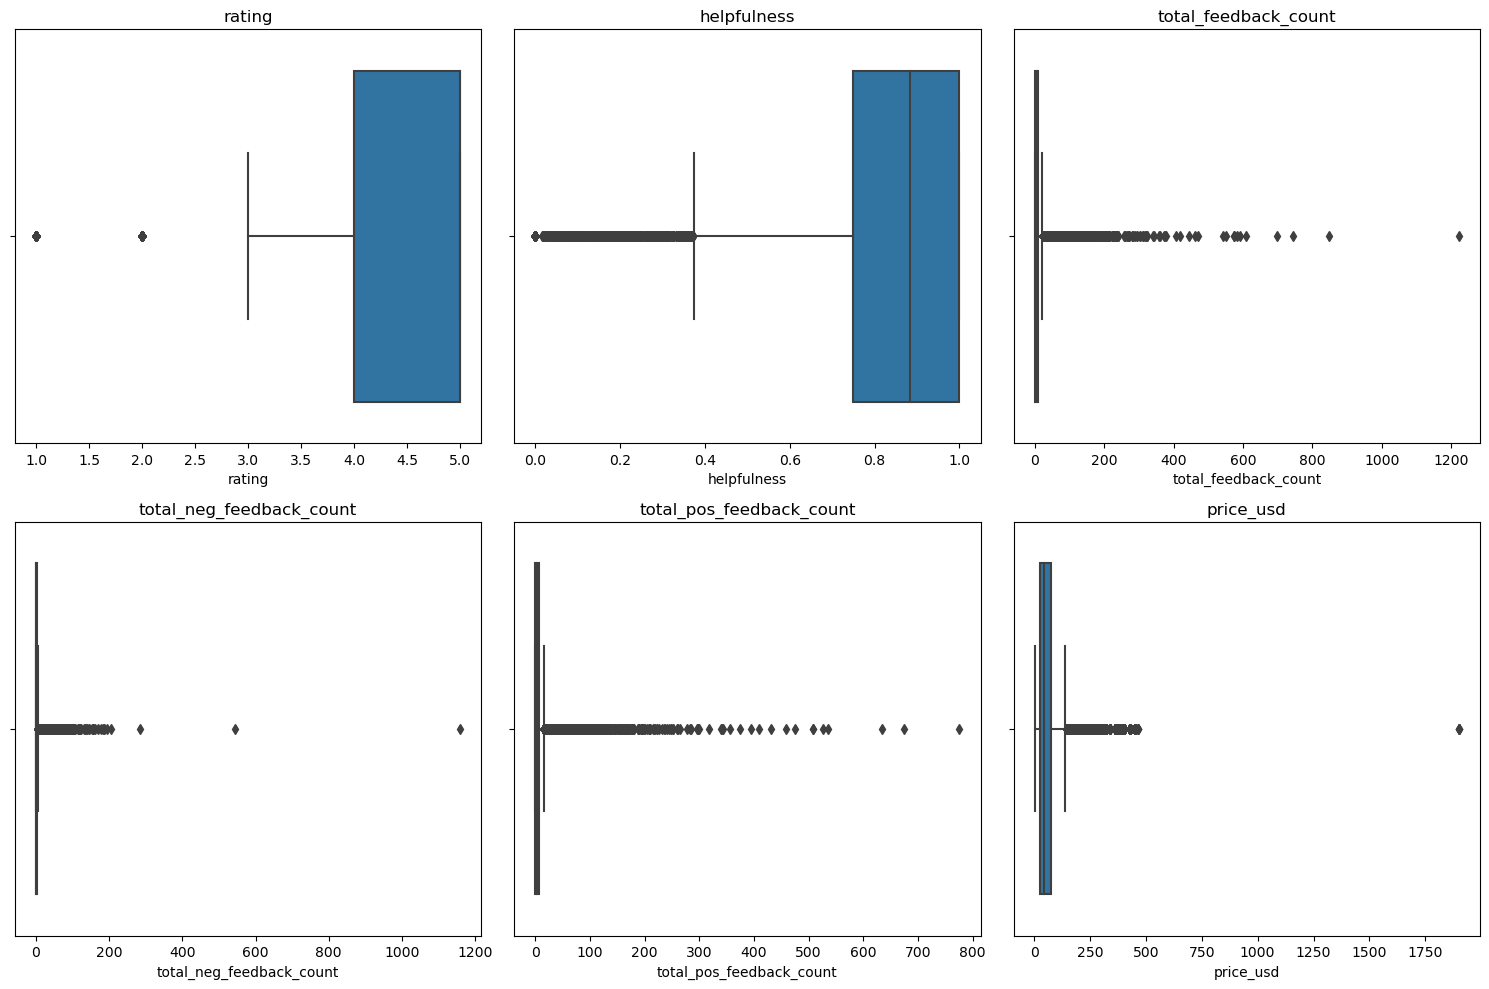

In [ ]:
#Univariate Outlier Visualization (Part of Univariate Analysis)
import matplotlib.pyplot as plt
import seaborn as sns

numeric_cols = ['rating', 'helpfulness', 'total_feedback_count',
                'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_cols, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(x=df[col])
    plt.title(col)
plt.tight_layout()
plt.show()


In [12]:
#Outlier Handling
columns_to_cap = ['helpfulness', 'total_feedback_count', 
                  'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd']

def cap_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)  # 25th percentile
    Q3 = df[column].quantile(0.75)  # 75th percentile
    IQR = Q3 - Q1  # Interquartile range
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df[column] = df[column].clip(lower=lower_bound, upper=upper_bound)
    return df

for col in columns_to_cap:
    df = cap_outliers_iqr(df, col)



Clean Categorical Variables

In [13]:
# Convert all entries in the 'skin_tone' column to lowercase for consistency
# Replace incorrect or merged values with standardized ones
df['skin_tone'] = df['skin_tone'].str.lower().replace({
    'lightmedium': 'light medium',   # Fix merged category
    'mediumtan': 'medium tan',       # Fix merged category
    'fairlight': 'fair light',       # Fix merged category
    'notsurest': 'unknown'           # Replace unclear value with 'unknown'
})

# Convert 'eye_color' values to lowercase and standardize spelling
df['eye_color'] = df['eye_color'].str.lower().replace({
    'grey': 'gray'  # American English standard
})

# Convert all entries in the 'skin_type' column to lowercase
df['skin_type'] = df['skin_type'].str.lower()

# Convert all entries in the 'hair_color' column to lowercase and standardize category
df['hair_color'] = df['hair_color'].str.lower().replace({
    'brunette': 'brown'  # Merge similar categories
})

# Convert all entries in the 'brand_name' column to lowercase for consistency
df['brand_name'] = df['brand_name'].str.lower()


Analysis Question
What factors influence user ratings the most in product reviews?

Feature Engineering, Encoding, Scaling, and Visualizations

In [14]:
#Calculates number of words in each review—helps understand if longer reviews relate to ratings.
df['review_length'] = df['review_text'].str.split().str.len()

#Flags whether the skin type is provided. This might influence rating quality.

df['is_skin_type_known'] = df['skin_type'].apply(lambda x: 0 if x == 'unknown' else 1)

#Converts rating into a binary class for grouping visualizations.

df['rating_class'] = df['rating'].apply(lambda x: 'high' if x >= 4 else 'low')

#Measures how popular each brand is based on its frequency in the dataset.

brand_counts = df['brand_name'].value_counts()
df['brand_popularity'] = df['brand_name'].map(brand_counts)





In [15]:
#Encoding
df_encoded = pd.get_dummies(df, columns=['skin_tone', 'eye_color', 'skin_type', 'hair_color'], drop_first=True)


In [16]:
#Scale numerical features so that all values are in the same range:

#Scaling ensures that features like price and feedback count don’t dominate the model due to larger numerical ranges.

scaler = StandardScaler()
scaled_cols = ['helpfulness', 'total_feedback_count', 'total_neg_feedback_count', 'total_pos_feedback_count', 'price_usd', 'review_length']
df[scaled_cols] = scaler.fit_transform(df[scaled_cols])



Visualizations

<Axes: xlabel='skin_type'>

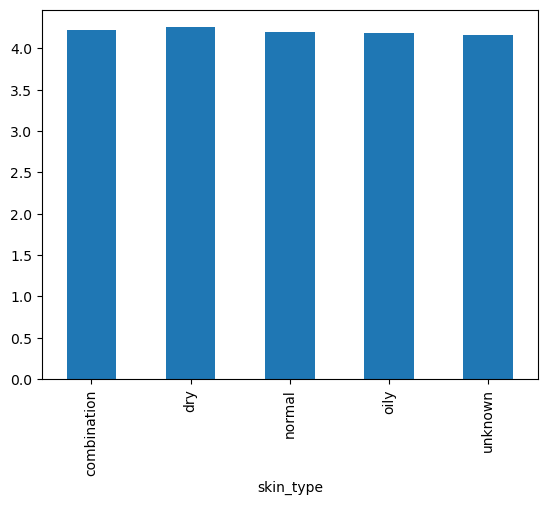

In [17]:
#Bar Charts: comparing average rating by category:

df.groupby('skin_type')['rating'].mean().plot(kind='bar')


Bivariate Analysis: Rating class vs Review length

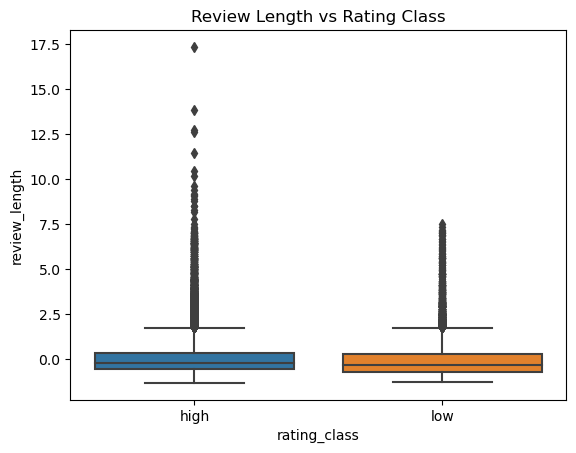

In [18]:
# Boxplot showing how review length varies across different rating classes (e.g., 1 to 5 stars)
sns.boxplot(x='rating_class', y='review_length', data=df)
plt.title("Review Length vs Rating Class")  # Set the title of the plot
plt.show()  # Display the plot


Univariate Analysis: Distribution of review lengths

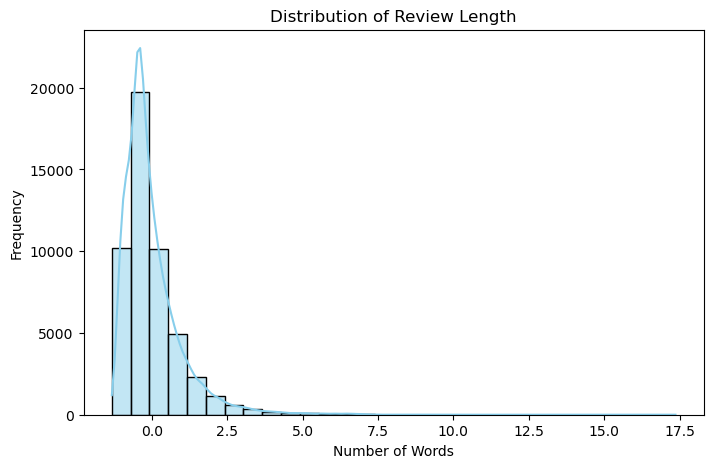

In [19]:
# Plotting the distribution of review lengths (number of words)
plt.figure(figsize=(8, 5))  # Set figure size
sns.histplot(df['review_length'], bins=30, kde=True, color='skyblue')  # Histogram with 30 bins and KDE line
plt.title("Distribution of Review Length")  # Title of the plot
plt.xlabel("Number of Words")  # Label for x-axis
plt.ylabel("Frequency")  # Label for y-axis
plt.show()  # Show the histogram


Bivariate Analysis: Skin type availability counts (categorical vs count)

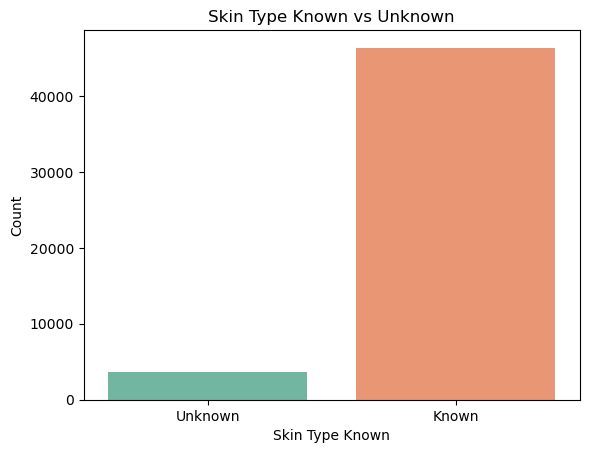

In [20]:
# Count plot showing how many entries have known vs unknown skin type information
sns.countplot(x='is_skin_type_known', data=df, palette='Set2')  # Create count bar plot with custom color palette
plt.xticks([0, 1], ['Unknown', 'Known'])  # Set custom tick labels for 0 and 1
plt.title("Skin Type Known vs Unknown")  # Title of the plot
plt.xlabel("Skin Type Known")  # Label for x-axis
plt.ylabel("Count")  # Label for y-axis
plt.show()  # Display the plot


Univariate Visualization: Skin Type Pie Chart

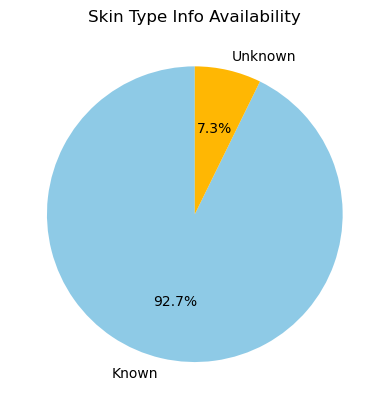

In [21]:
# Pie chart for the same info: proportion of known vs unknown skin type data
df['is_skin_type_known'].value_counts().plot.pie(
    labels=['Known', 'Unknown'],  # Labels for the slices
    autopct='%1.1f%%',  # Display percentage values
    colors=['#8ecae6', '#ffb703'],  # Custom slice colors
    startangle=90  # Start the first slice from 90 degrees (top of the circle)
)
plt.title("Skin Type Info Availability")  # Title of the pie chart
plt.ylabel('')  # Remove the default y-axis label
plt.show()  # Show the pie chart


Summary of Findings
Review Length: Longer reviews are more commonly associated with higher ratings, suggesting that satisfied users tend to provide more detailed feedback.

Skin Type Information: Reviews with known skin type data show distinct rating patterns, indicating its relevance in user satisfaction.

Helpfulness Score: Highly rated reviews often have higher helpfulness scores, showing community agreement.

Brand Popularity: Popular brands tend to receive higher average ratings, possibly due to trust and consistent product quality.

Price Impact: Products with extreme prices (very low or high) tend to show more variability in ratings.

Overall, user ratings are influenced by a mix of textual detail, user profile information, and product attributes.